In [1]:
import matplotlib.pyplot as plt
from figuretools.JEOL300F_loading import load_dm3_by_unique_number
from figuretools.diffraction_tools import angle_vectors_general, cubic_lattice, orthorombic_lattice
from figuretools.plotting_utils import square_crop, plot_circles_along_line, create_parallelogram, create_scale_bar, plot_image_with_physical_size, interactive_plotting
import os
import matplotlib as mpl

In [2]:
print(mpl.get_cachedir())

/home/lazari/.cache/matplotlib


In [3]:
font = {'family' : 'Arial','weight' : 'normal'} 
plt.rc('font', **font)      

plt.rcParams['text.usetex'] = False # TeX rendering


In [4]:
#root_path = r"C:\Users\Isac Lazar\OneDrive - Lund University\Dokument\Projekt\Chalmers Al-AM\data\JEOL3000F\2023-10-12\raw"
root_path = '/data/lazari/data/Al_AM_TEM/2023-10-12/'
im_nr1 = 245
im_nr2 = 250 # is on spot [-2,0,2]
# zone axis is [-1,4,-1]
 
im1, md1 = load_dm3_by_unique_number(root_path, im_nr1)
im2, md2 = load_dm3_by_unique_number(root_path, im_nr2)

im1 = square_crop(im1)
#im4 = square_crop(im4)

Text(0.5, 0, 'nm$^{-1}$')

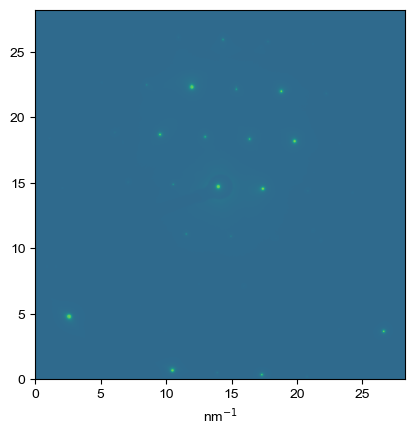

In [5]:
fig, ax= plt.subplots()
plot_image_with_physical_size(ax=ax, im=im1, x_scale=md1['axis-1']['scale'], y_scale=md1['axis-0']['scale'], show_axis=True)
ax.set_xlabel('nm$^{-1}$')

Text(0.5, 0, 'nm')

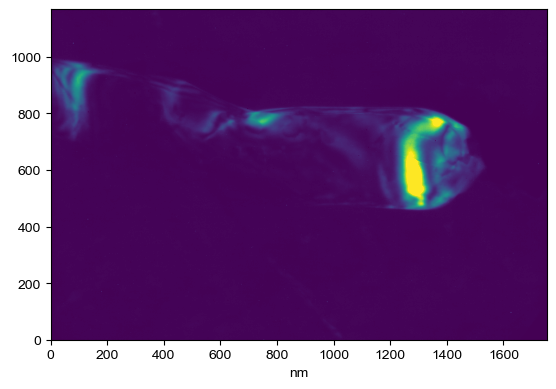

In [6]:
fig, ax= plt.subplots()
plot_image_with_physical_size(ax=ax, im=im2, x_scale=md2['axis-1']['scale'], y_scale=md2['axis-0']['scale'], show_axis=True, vmax=1500, vmin=0)
ax.set_xlabel('nm')

In [7]:
a_v, b_v, c_v = orthorombic_lattice(7.54, 6.498, 8.858)

In [8]:
u = (2,0,-2)
v = (-1,-1,-3)
print(180-angle_vectors_general(u, v, a_v, b_v, c_v))
print(angle_vectors_general(u, v, a_v, b_v, c_v))
pg_angle = angle_vectors_general(u, v, a_v, b_v, c_v)

107.46530653368863
72.53469346631137


In [9]:
def plotter(line_start_dir1_x, line_start_dir1_y, line_end_dir1_x, line_end_dir1_y,
            n_diff_spot_circles_dir1_C=2,
            diff_spots_circle_labels_dir1_C =['000', '$\\overline{2}02'],
            pg_rot=86.7, pg_center_x=17.6, pg_center_y=20.2, 
            annotation_linewidth= 4):
    fig, ax = plt.subplots()
    p = {}
    p["diff_spots_circle_labels_dir1_C"] = diff_spots_circle_labels_dir1_C
    p["line_start_dir1_x_C"] =line_start_dir1_x
    p["line_start_dir1_y_C"] = line_start_dir1_y
    p["line_end_dir1_x_C"] = line_end_dir1_x
    p["line_end_dir1_y_C"] = line_end_dir1_y
    p["n_diff_spot_circles_dir1_C"] = n_diff_spot_circles_dir1_C
    p["diff_spots_circle_radius"] = 0.4
    p["annotation_fs"] = 7
    p["annotation_linewidths"] = 0.7
    plot_image_with_physical_size(ax=ax, im=im1, x_scale=md1['axis-1']['scale'], y_scale=md1['axis-0']['scale'], show_axis=True)
    # create parallelogram indicating reciprocal unit cell
    create_parallelogram(ax=ax, center=(pg_center_x, pg_center_y), width=3.94, height=3.42, 
                              smallest_angle=pg_angle, rotation_angle=pg_rot, edgecolor='white', linewidth=annotation_linewidth)
    create_scale_bar(ax, position=(2,2), size=(10,0.6), unit='nm$^{-1}$')
    
    # index a few diffraction spots along one direction
    plot_circles_along_line(ax, line_start=(p["line_start_dir1_x_C"], p["line_start_dir1_y_C"]), line_end=(p["line_end_dir1_x_C"], p["line_end_dir1_y_C"]), 
                            n_circles=p["n_diff_spot_circles_dir1_C"], labels=p["diff_spots_circle_labels_dir1_C"], radius=p["diff_spots_circle_radius"], 
                            plot_line=False, fill=False, fontsize=p["annotation_fs"], linewidth=p["annotation_linewidths"], color='white')
    
    


In [10]:
labels_dir1 = ['20$\\overline{2}$', '000', '$\\overline{2}02']

In [11]:
from ipywidgets import interactive, FloatSlider

In [12]:
line_start_dir1_x = FloatSlider(value=2, min=1.0, max=30.0, step=0.1, description='line_start_dir1_x')
line_start_dir1_y=FloatSlider(value=2, min=1.0, max=30.0, step=0.1, description='line_start_dir1_y')


line_end_dir1_x =FloatSlider(value=2, min=1.0, max=30.0, step=0.1, description='line_end_dir1_x')
line_end_dir1_y = FloatSlider(value=2, min=1.0, max=30.0, step=0.1, description='line_end_dir1_y')

interactive(plotter, line_start_dir1_x=line_start_dir1_x, line_start_dir1_y=line_start_dir1_y, 
            line_end_dir1_x=line_end_dir1_x, line_end_dir1_y=line_end_dir1_y)

interactive(children=(FloatSlider(value=2.0, description='line_start_dir1_x', max=30.0, min=1.0), FloatSlider(…

In [13]:
p = {}
p["scale_bar_fs"] = 20
p["titles_fs"] = 20 
p["annotation_fs"] =  7
p["annotation_linewidths"] = 0.7
p["letter_label_x_padding_ratio"] = 0.03
p["letter_label_y_padding_ratio"] = 0.03 
p["title_x_padding_ratio"] = 0.03
p["title_y_padding_ratio"] = 0.03 
p['title_A'] = 'Al$_6$Mn [$\\overline{1}$4$\\overline{1}$]'
p["sb_size_width_A"] = 10
p["sb_size_height_A"] =0.6 
p['pg_rot'] = 86.7
p['pg_angle'] = pg_angle
p['pg_center_x'] = 17.6
p['pg_center_y'] = 20.1
p['pg_width'] = 3.94
p['pg_height'] = 3.42

p['diff_spots_circle_radius'] = 0.4
p['line_start_dir1_x'] = 10.56
p['line_start_dir1_y'] = 14.85
p['line_end_dir1_x'] = 17.38
p['line_end_dir1_y'] = 14.53
p['n_diff_spot_circles_dir1'] = 3
p['diff_spots_circle_labels_dir1'] =  ['20$\\overline{2}$', '000', '$\\overline{2}$02']


p['line_start_dir2_x'] = 13
p['line_start_dir2_y'] = 18.5
p['line_end_dir2_x'] = 11.98
p['line_end_dir2_y'] = 22.3
p['n_diff_spot_circles_dir2'] = 2
p['diff_spots_circle_labels_dir2'] = ['$\\overline{1}$ $\\overline{1}$ $\\overline{3}$', '$\\overline{2}$ $\\overline{2}$ $\\overline{6}$']

p["diff_spot_for_DF_x"] =17.38
p["diff_spot_for_DF_y"] =14.53

p['title_B'] = 'DF TEM'
p["sb_position_x_B"] = 100 
p["sb_position_y_B"] =  100
p["sb_size_width_B"] = 500
p["sb_size_height_B"] =  40


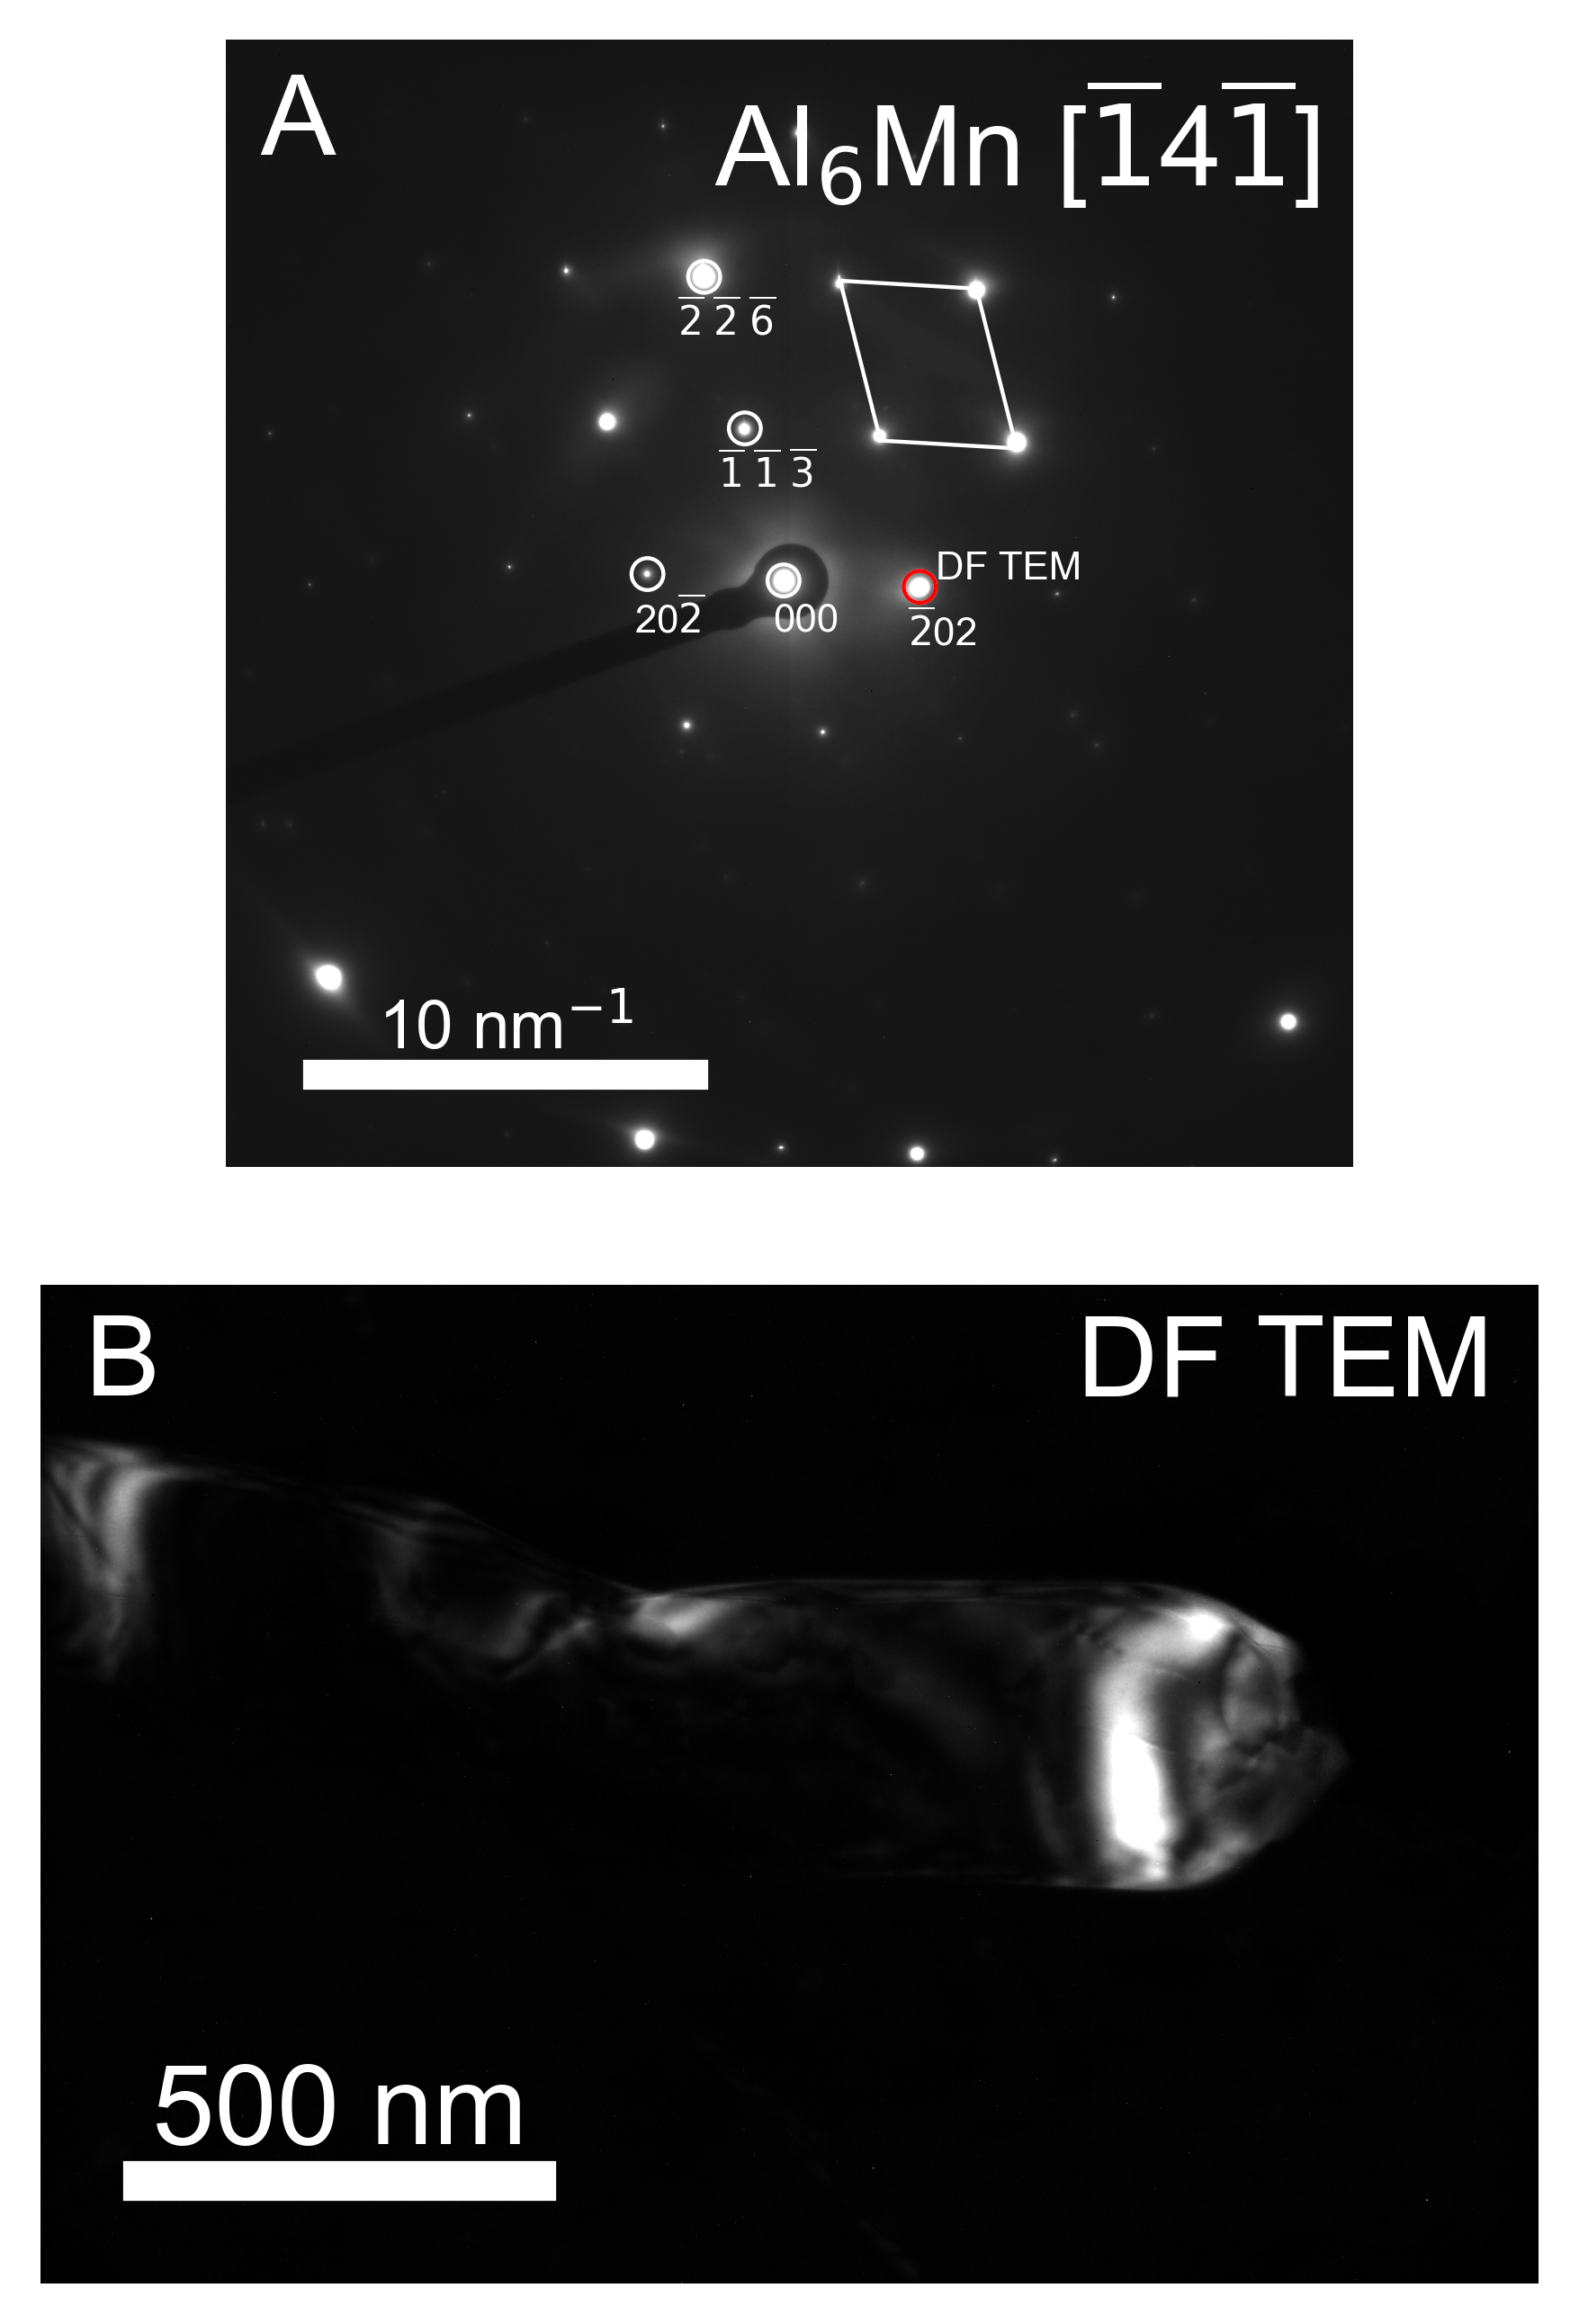

In [14]:
from matplotlib.patches import Circle
fig = plt.figure(figsize=(4,6), dpi=450)
axs = fig.subplots(2,1)

curr_ax = axs[0]
plot_image_with_physical_size(ax=curr_ax, cmap='gray', vmin=-200, vmax=2500, im=im1, x_scale=md1['axis-1']['scale'], y_scale=md1['axis-0']['scale'], show_axis=False)
x_width = curr_ax.get_xlim()[1] -  curr_ax.get_xlim()[0] 
y_width = curr_ax.get_ylim()[1] -  curr_ax.get_ylim()[0] 
curr_ax.text(x=x_width*p["letter_label_x_padding_ratio"], y=y_width*(1- p["letter_label_y_padding_ratio"]), 
                s='A', ha='left', va='top', color='white', fontsize=p["titles_fs"])
# create title text
curr_ax.text(x=x_width*(1 - p["title_x_padding_ratio"]),y= y_width*(1 - p["title_y_padding_ratio"]), 
                s=p["title_A"], ha='right', va='top', color='white', fontsize=p["titles_fs"])  

# create parallelogram indicating reciprocal unit cell
create_parallelogram(ax=curr_ax, center=(p['pg_center_x'], p['pg_center_y']), width=3.94, height=3.42, 
                              smallest_angle=p['pg_angle'], rotation_angle=p['pg_rot'], edgecolor='white', linewidth=p['annotation_linewidths'])
create_scale_bar(curr_ax, position=(2,2), size=(p["sb_size_width_A"], p["sb_size_height_A"]), unit='nm$^{-1}$')
    
# index a few diffraction spots along one direction
plot_circles_along_line(curr_ax, line_start=(p["line_start_dir1_x"], p["line_start_dir1_y"]), line_end=(p["line_end_dir1_x"], p["line_end_dir1_y"]), 
    n_circles=p["n_diff_spot_circles_dir1"], labels=p["diff_spots_circle_labels_dir1"], radius=p["diff_spots_circle_radius"], 
        plot_line=False, fill=False, fontsize=p["annotation_fs"], linewidth=p["annotation_linewidths"], color='white', ha='center', va='top')
# index a few diffraction spots along one direction
plot_circles_along_line(curr_ax, line_start=(p["line_start_dir2_x"], p["line_start_dir2_y"]), line_end=(p["line_end_dir2_x"], p["line_end_dir2_y"]), 
    n_circles=p["n_diff_spot_circles_dir2"], labels=p["diff_spots_circle_labels_dir2"], radius=p["diff_spots_circle_radius"], 
        plot_line=False, fill=False, fontsize=p["annotation_fs"], linewidth=p["annotation_linewidths"], color='white', ha='center', va='top')

# add a red circle indicating the diffraction spot used for DF TEM
c = Circle((p["diff_spot_for_DF_x"], p["diff_spot_for_DF_y"]), radius=p["diff_spots_circle_radius"], 
            linewidth=p["annotation_linewidths"],fill=False, color='r')
curr_ax.add_patch(c)
curr_ax.text(x=p["diff_spot_for_DF_x"]+0.4, y=p["diff_spot_for_DF_y"], s='DF TEM', fontsize=p["annotation_fs"], color='white', ha='left', va='bottom' )

curr_ax = axs[1]
plot_image_with_physical_size(ax=curr_ax, cmap='gray', im=im2, x_scale=md2['axis-1']['scale'], y_scale=md2['axis-0']['scale'], show_axis=False, vmax=1500, vmin=0)
x_width = curr_ax.get_xlim()[1] -  curr_ax.get_xlim()[0] 
y_width = curr_ax.get_ylim()[1] -  curr_ax.get_ylim()[0] 
create_scale_bar(curr_ax, position=(p["sb_position_x_B"], p["sb_position_y_B"]), size=(p["sb_size_width_B"], p["sb_size_height_B"]), 
                     unit="nm", fontsize=p["scale_bar_fs"])

curr_ax.text(x=x_width*p["letter_label_x_padding_ratio"], y=y_width*(1- p["letter_label_y_padding_ratio"]), 
                s='B', ha='left', va='top', color='white', fontsize=p["titles_fs"])
# create title text
curr_ax.text(x=x_width*(1 - p["title_x_padding_ratio"]),y= y_width*(1 - p["title_y_padding_ratio"]), 
                s=p["title_B"], ha='right', va='top', color='white', fontsize=p["titles_fs"])  

fig.tight_layout()

out_path = "/data/lazari/code/in-situ_anneal_AM_AlMnCrZr/in-situ_anneal_AM_AlMnCrZr/out"

plt.savefig(os.path.join(out_path, 'Al6Mn-diffraction.png'), dpi=600)
plt.savefig(os.path.join(out_path, 'Al6Mn-diffraction.svg'), dpi=600)
plt.rcParams['svg.fonttype'] = 'none' # making sure texts are saved as texts and not paths. This assumes that the machine opening the svg file has the font installed
plt.savefig(os.path.join(out_path, 'Al6Mn-diffraction_editable_test.svg'), dpi=600)
    
